<a href="https://colab.research.google.com/github/subbu27iitb/Deep-Learning/blob/main/LSTM_Time_Series_Forecasting_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
import numpy as np

In [13]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [14]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)
print(X.shape)
print(X)
print(y)


(6, 3)
[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [18]:
n_features = 1
X1 = X.reshape(X.shape[0],X.shape[1], n_features)
print(X1.shape)
print(X.shape)

(6, 3, 1)
(6, 3)


#**Building LSTM Model**

In [20]:
#define model
model= Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model
model.fit(X,y, epochs=300, verbose=0)

#**Predicting Future steps-10 days**

In [24]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.13507]
1 day input [196.        210.        223.1350708]
1 day output [[234.52689]]
2 day input [210.         223.1350708  234.52688599]
2 day output [[248.6973]]
3 day input [223.13507 234.52689 248.6973 ]
3 day output [[262.39612]]
4 day input [234.52689 248.6973  262.39612]
4 day output [[275.81696]]
5 day input [248.6973  262.39612 275.81696]
5 day output [[290.85892]]
6 day input [262.39612 275.81696 290.85892]
6 day output [[305.8613]]
7 day input [275.81696 290.85892 305.8613 ]
7 day output [[321.25644]]
8 day input [290.85892 305.8613  321.25644]
8 day output [[337.7489]]
9 day input [305.8613  321.25644 337.7489 ]
9 day output [[354.56918]]
[223.13507, 234.52689, 248.6973, 262.39612, 275.81696, 290.85892, 305.8613, 321.25644, 337.7489, 354.56918]


#**Output-Visualization**

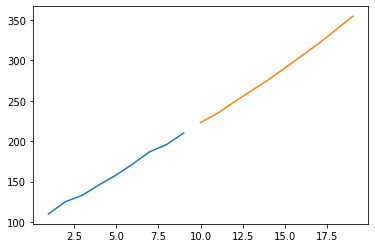

In [26]:
import matplotlib.pyplot as plt

day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)